## Load The DataSet

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
## import pandas as pd
## import matplotlib.pyplot as plt
## import seaborn as sns

df = pd.read_csv(r"C:\Users\User\Downloads\Telegram Desktop\FastagFraudDetection\FastagFraudDetection.csv")
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
pip install "pybind11>=2.12"

## Dataset Description

In [8]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [10]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,3/10/2023 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


In [12]:
df.sample(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
3856,3857,2/27/2023 9:10,Sedan,FTG-112-VBN-654,A-101,Express,Medium,120,90,"12.84197701525119, 77.67547528176169",63,TN12JK3456,Fraud
4051,4052,2/23/2023 20:58,Van,FTG-101-QWE-987,B-102,Regular,Medium,120,110,"12.936687032945434, 77.53113977439017",70,KA78BC6789,Fraud
3579,3580,6/28/2023 6:57,Car,FTG-933-JOP-321,A-101,Regular,Small,100,100,"12.84197701525119, 77.67547528176169",84,KA45IJ1234,Not Fraud
3349,3350,2/13/2023 17:25,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",76,MH67OP6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [14]:
df.sample(4)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4630,4631,12/16/2023 4:47,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",52,KA67GH8901,Not Fraud
1007,1008,12/4/2023 14:30,SUV,FTG-901-BCA-567,B-102,Regular,Large,150,150,"12.84197701525119, 77.67547528176169",92,GA07MN5678,Not Fraud
4230,4231,5/13/2023 0:04,Car,FTG-034-QRS-444,A-101,Express,Small,70,70,"12.936687032945434, 77.53113977439017",43,KA67EF8301,Not Fraud
228,229,1/28/2023 21:25,Van,FTG-119-QAZ-541,B-102,Express,Medium,140,90,"13.059816123454882, 77.77068662374292",57,KA74ST8801,Fraud


## Summary Statistics
#### We use summary statistics to get an overview of the numerical features

In [18]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [20]:
df.select_dtypes('number').mean()

Transaction_ID        2500.5000
Transaction_Amount     161.0620
Amount_paid            141.2610
Vehicle_Speed           67.8512
dtype: float64

In [22]:
df.select_dtypes('number').median()

Transaction_ID        2500.5
Transaction_Amount     130.0
Amount_paid            120.0
Vehicle_Speed           67.0
dtype: float64

In [24]:
df.select_dtypes('number').mode().iloc[0]

Transaction_ID         1.0
Transaction_Amount     0.0
Amount_paid            0.0
Vehicle_Speed         55.0
Name: 0, dtype: float64

In [26]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [30]:
df['FastagID'].fillna(df['FastagID'].mode()[0])

0       FTG-001-ABC-121
1       FTG-002-XYZ-451
2       FTG-000-QAZ-210
3       FTG-044-LMN-322
4       FTG-505-DEF-652
             ...       
4995    FTG-445-EDC-765
4996    FTG-446-LMK-432
4997    FTG-447-PLN-109
4998    FTG-458-VFR-876
4999    FTG-459-WSX-543
Name: FastagID, Length: 5000, dtype: object

In [32]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [38]:
df.drop_duplicates(inplace = True)
df.head(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


## Data Visualization 

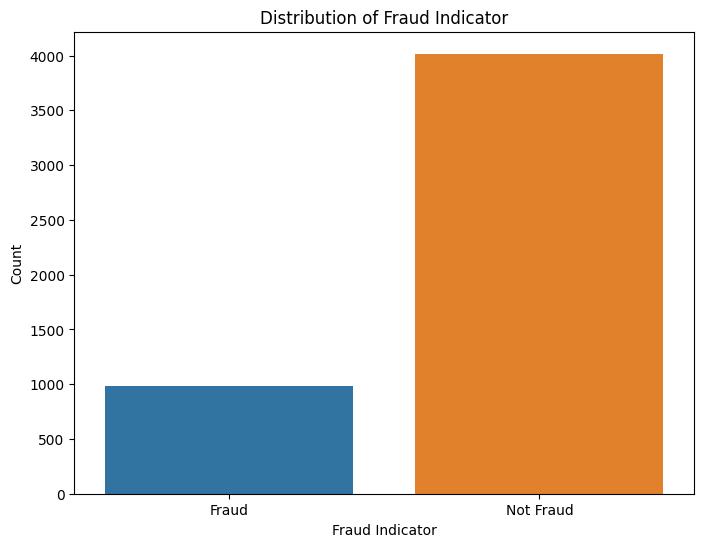

In [49]:
## 1. Visualize the distribution of the target variable
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x ='Fraud_indicator', data=df)
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


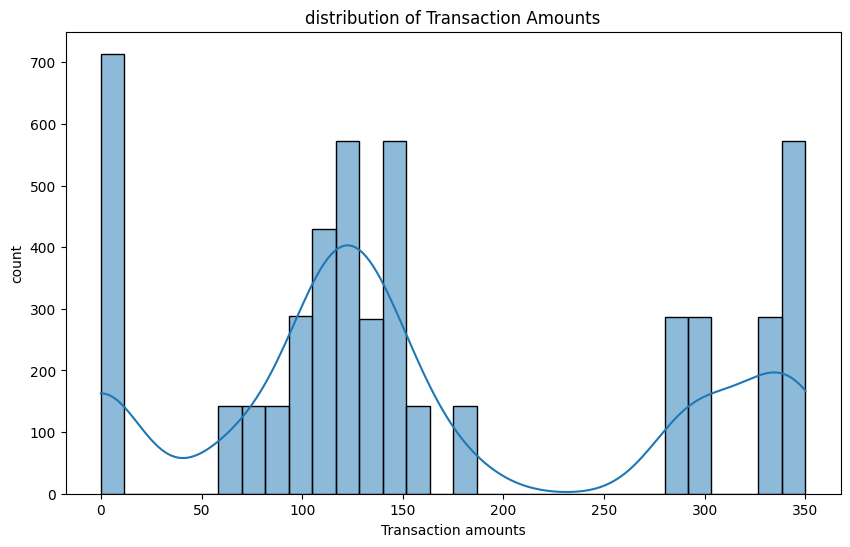

In [59]:
## Visualize the distribution of Transaction Amounts
plt.figure(figsize = (10, 6))
sns.histplot(x = 'Transaction_Amount', data=df, bins=30, kde = True)
plt.title('distribution of Transaction Amounts')
plt.xlabel('Transaction amounts')
plt.ylabel('count')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


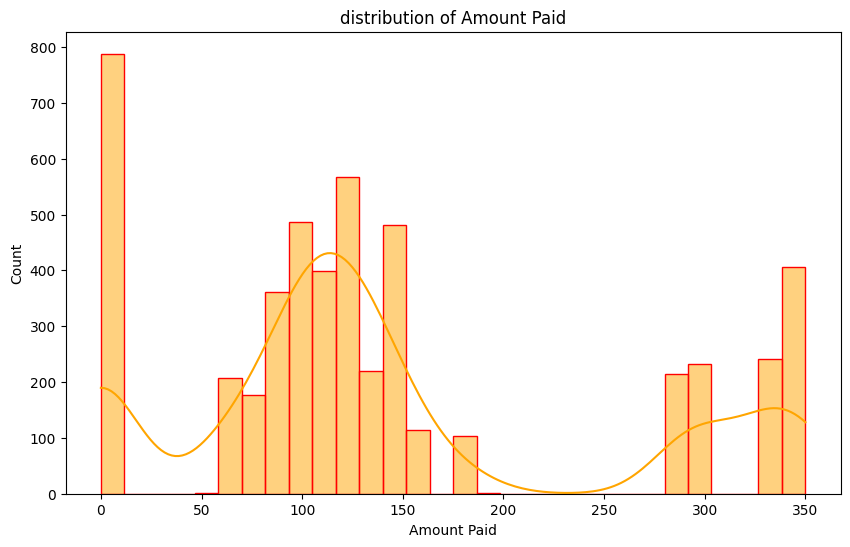

In [63]:
## Distribution of Amount Paid
plt.figure(figsize=(10,6))
sns.histplot(x= 'Amount_paid', data=df, bins=30, kde = True, color='orange', edgecolor= 'red')
plt.title('distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('Count')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


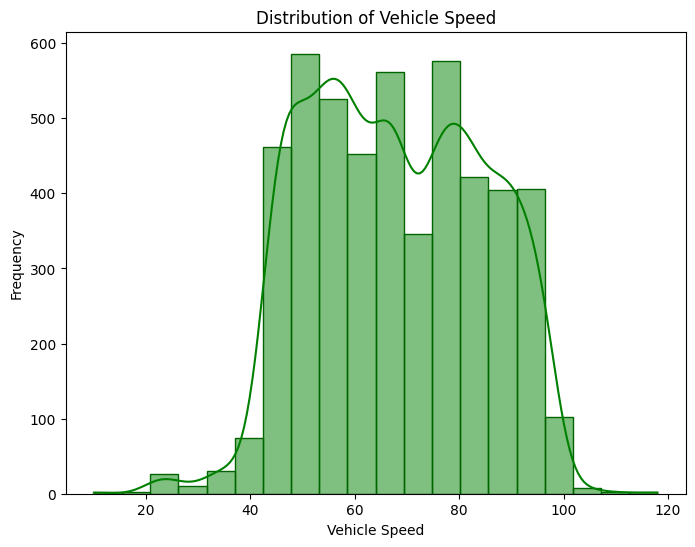

In [67]:
## The distribution of Vehicle Speed
plt.figure(figsize=(8,6))
sns.histplot(x = 'Vehicle_Speed', data = df, bins=20, kde=True, color='green', 
             edgecolor='darkgreen')
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Transaction Amount vs Amount Paid')

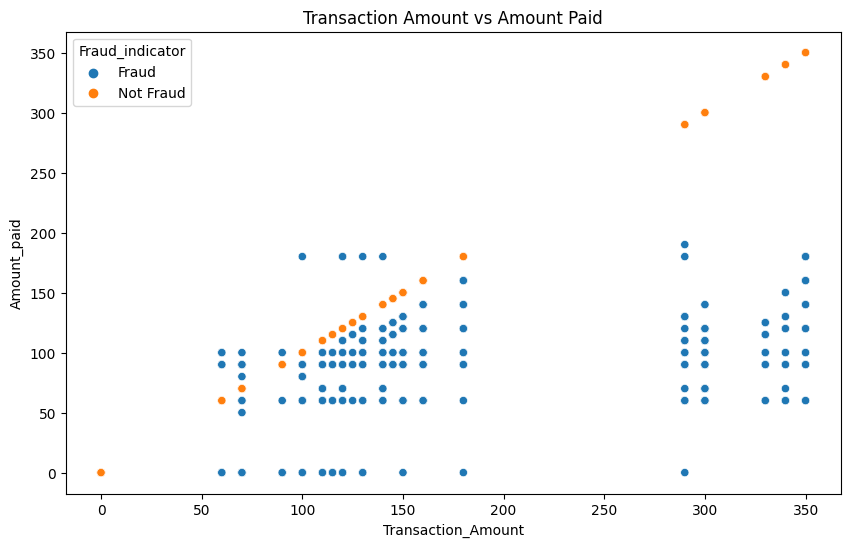

In [71]:
## Visualize the relationship between transaction amount ana amount paid
plt.figure(figsize=(10,6))
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue= 'Fraud_indicator', data=df)
plt.title('Transaction Amount vs Amount Paid')

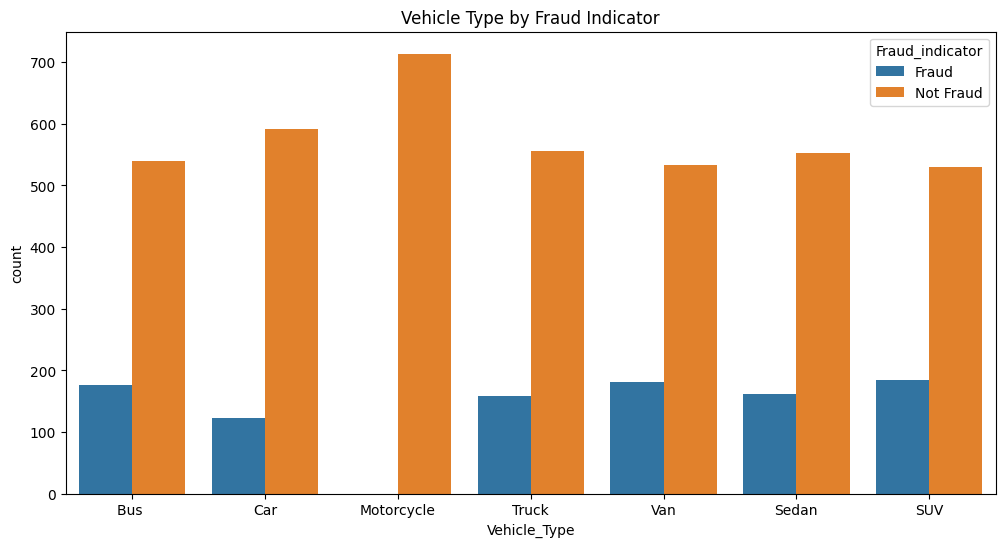

In [73]:
## Countplot for Vehicle Type variables by fraud indicator
plt.figure(figsize=(12,6))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df)
plt.title('Vehicle Type by Fraud Indicator')
plt.show()

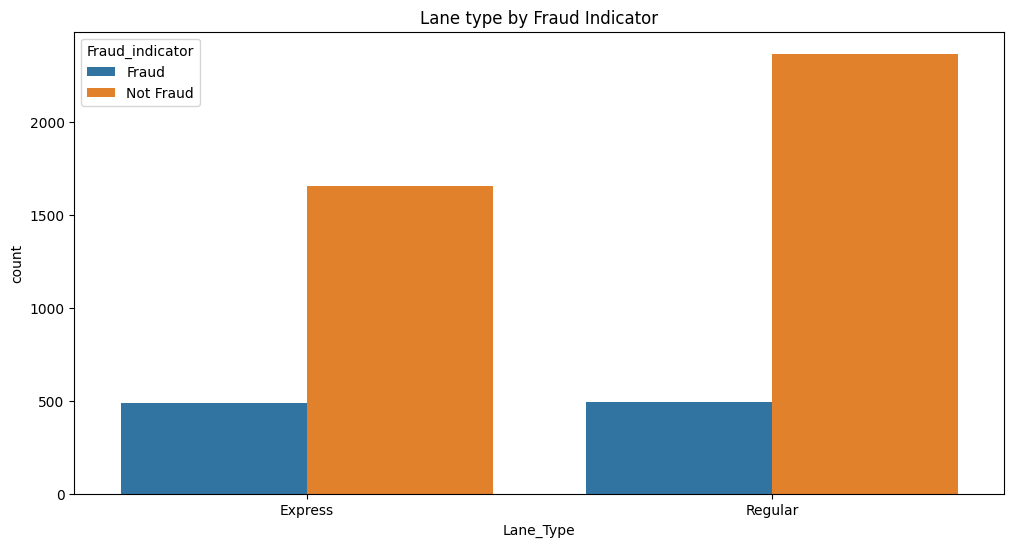

In [77]:
## Countplots for lane type variables by fraud indicator
plt.figure(figsize=(12,6))
sns.countplot(x='Lane_Type', hue = 'Fraud_indicator', data=df)
plt.title('Lane type by Fraud Indicator')
plt.show()

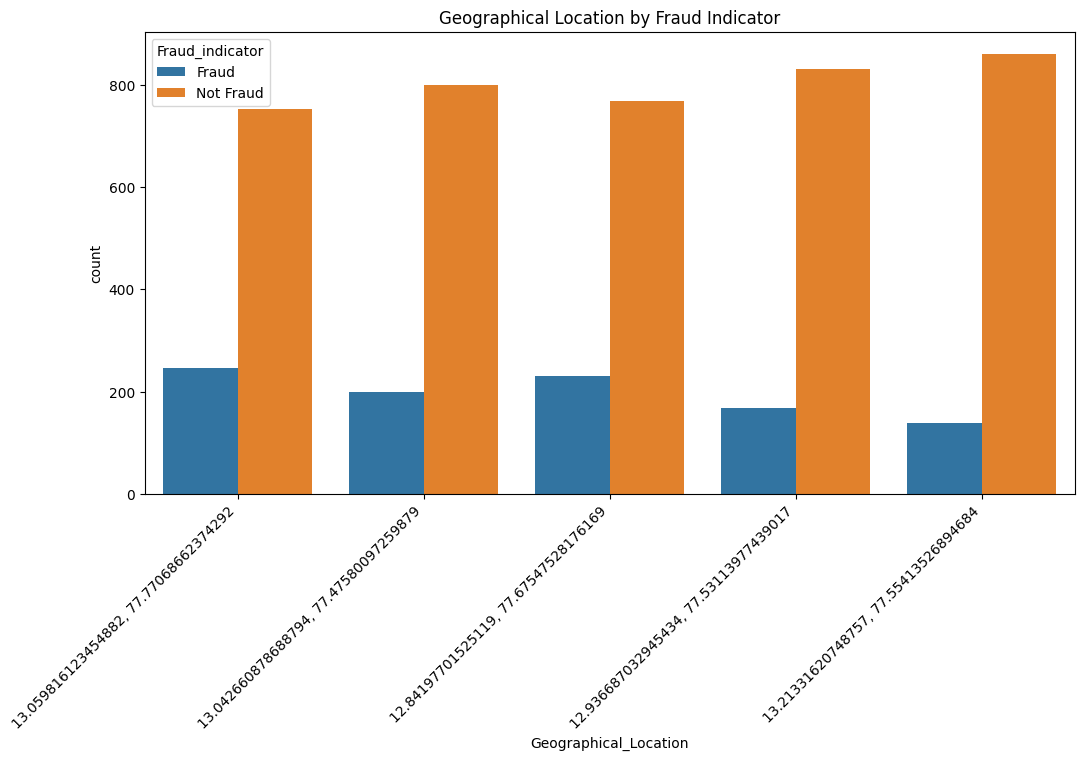

In [89]:
## Countplot for Geographical Location variables by fraud indicator
plt.figure(figsize=(12,6))
sns.countplot(x='Geographical_Location', hue='Fraud_indicator', data=df)
plt.title('Geographical Location by Fraud Indicator')
plt.xticks(rotation=45, ha='right')  # or 60/90 for more tilt
#plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

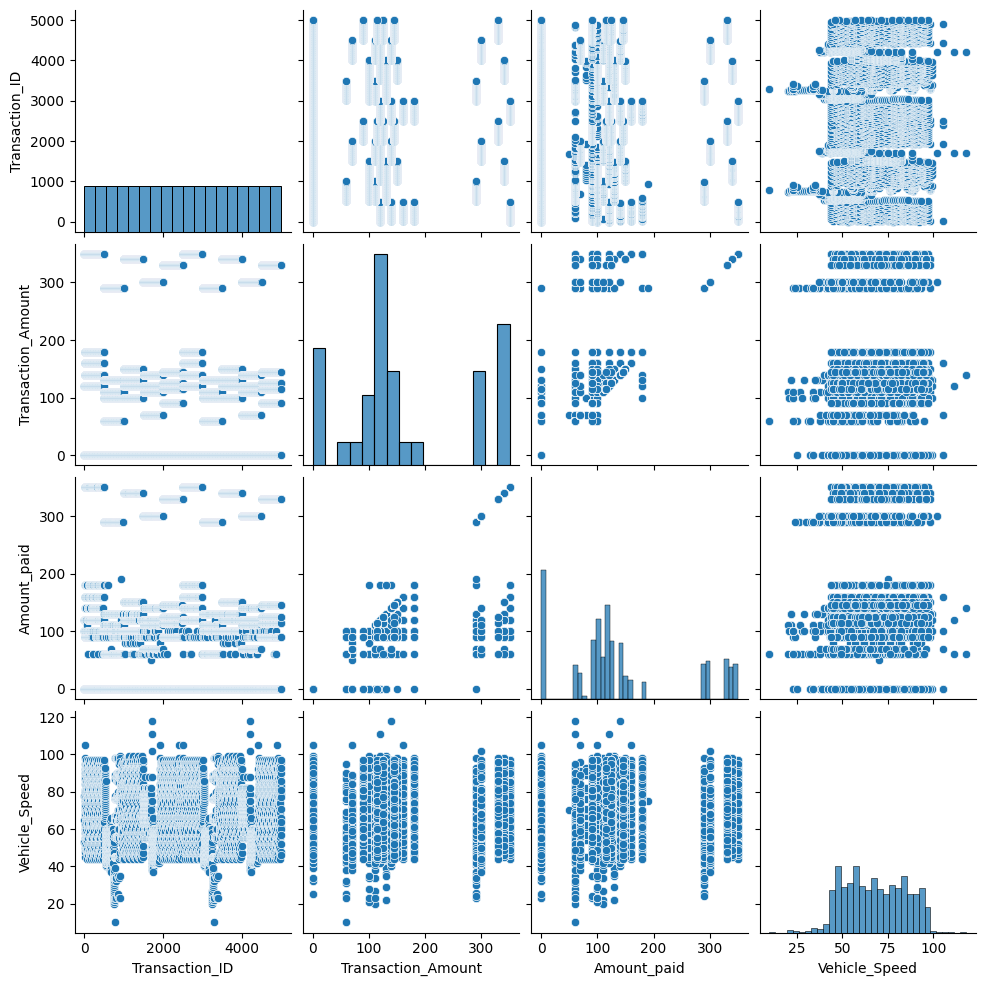

In [91]:
sns.pairplot(df)

## Heat Map

In [96]:
df1 = df.select_dtypes('number')
df1.head()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,2,120,100,78
2,3,0,0,53
3,4,350,120,92
4,5,140,100,60


In [98]:
df1.corr()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_ID,1.000000,-0.023515,0.044433,0.014378
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229
Amount_paid,0.044433,0.870078,1.000000,0.039027
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000


<Axes: >

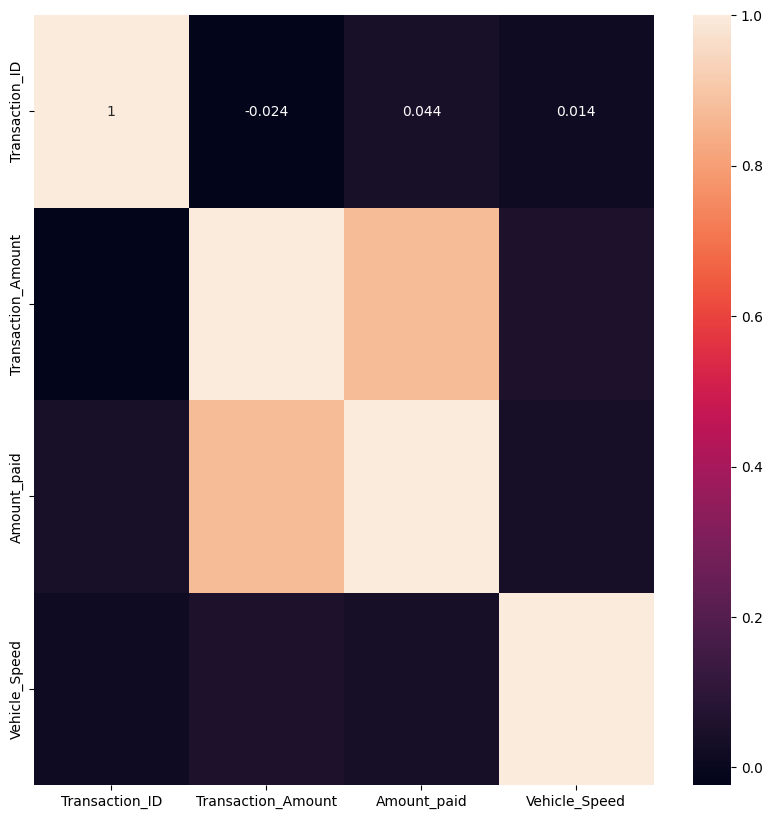

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)

## Label Encoding for Categorical Features: Ensure that categorical features are encoded

In [105]:
label_encoders = {}
for column in ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Fraud_indicator','FastagID','TollBoothID',]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [107]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,2,0,0,0,350,120,3,65,KA11AB1234,0
1,2,1/7/2023 14:55,1,9,1,1,2,120,100,3,78,KA66CD5678,0
2,3,1/8/2023 18:25,2,0,3,1,2,0,0,3,53,KA88EF9012,1
3,4,1/9/2023 2:05,5,241,2,1,0,350,120,3,92,KA11GH3456,0
4,5,1/10/2023 6:35,6,2860,1,0,1,140,100,3,60,KA44IJ6789,0


## Feature Extraction: Additional time-based features (Hour, Day, Month, Weekday) have been extracted from the Timestamp.

In [112]:
# Convert timestamp to datetime and extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday
df.sample(6)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
3224,3225,2023-07-15 08:08:00,5,590,2,0,0,290,290,2,58,GJ67AB4567,1,8,15,7,5
3837,3838,2023-04-19 04:12:00,0,705,2,1,0,340,340,0,90,TN23XY6789,1,4,19,4,2
261,262,2023-03-02 14:30:00,2,0,4,1,2,0,0,3,79,KA73GH4167,1,14,2,3,3
1940,1941,2023-06-08 07:10:00,1,3421,0,0,2,70,0,1,52,KA87WX2345,0,7,8,6,3
1249,1250,2023-07-08 13:35:00,5,3707,2,1,0,340,340,0,82,AP73QR3456,1,13,8,7,5
3357,3358,2023-06-27 19:03:00,5,3573,2,1,0,290,290,2,78,KA89JF8901,1,19,27,6,1


In [114]:
# Drop the original timestamp column and Transaction_ID as it is not informative
df.drop(columns=['Timestamp', 'Transaction_ID'], inplace=True)

In [116]:
df.head(5)

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
0,0,2,0,0,0,350,120,3,65,KA11AB1234,0,11,6,1,4
1,1,9,1,1,2,120,100,3,78,KA66CD5678,0,14,7,1,5
2,2,0,3,1,2,0,0,3,53,KA88EF9012,1,18,8,1,6
3,5,241,2,1,0,350,120,3,92,KA11GH3456,0,2,9,1,0
4,6,2860,1,0,1,140,100,3,60,KA44IJ6789,0,6,10,1,1


## 1. Model Training: Train a variety of machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting).
## 2. Model Evaluation: Evaluate model performance using metrics such as precision, recall, F1 score, and accuracy. Additionally, handle class imbalance using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) if necessary

In [120]:
x = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test

(      Vehicle_Type  FastagID  TollBoothID  Lane_Type  Vehicle_Dimensions  \
 4227             4       155            0          1                   1   
 4676             3      1028            1          0                   0   
 800              2         0            5          1                   2   
 3671             2         0            5          1                   2   
 4193             3      1369            1          1                   0   
 ...            ...       ...          ...        ...                 ...   
 4426             1      2434            0          0                   2   
 466              6      3232            1          0                   1   
 3092             6      3449            1          0                   1   
 3772             4       716            0          0                   1   
 860              3      3585            1          0                   0   
 
       Transaction_Amount  Amount_paid  Geographical_Location  Vehicle_Spe

## Logistic Regression Model

In [135]:
x_train = x_train.drop(columns=['Vehicle_Plate_Number'])
x_test = x_test.drop(columns=['Vehicle_Plate_Number'])


In [137]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [145]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Logistic Regression Model Results:')
print('Accuracy:', accuracy)
print('Confusion Matrix :',conf_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Logistic Regression Model Results:
Accuracy: 0.983
Confusion Matrix : [[200  17]
 [  0 783]]
Precision: 0.97875
Recall: 1.0
F1 Score: 0.9892608970309539


## Decision Tree Classification 

In [152]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [154]:
y_pred1 = model1.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [211]:
accuracy1 = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)

print('Decision Tree Classification Model Results:')
print('Accuracy:', accuracy1)
print('Confusion Matrix :',conf_matrix1)
print('Precision:', precision1)
print('Recall:', recall1)
print('F1 Score:', f11)

Decision Tree Classification Model Results:
Accuracy: 0.999
Confusion Matrix : [[216   1]
 [  0 783]]
Precision: 0.9987244897959183
Recall: 1.0
F1 Score: 0.9993618379068284


In [160]:
model.score(x_train,y_train)

0.98725

In [162]:
model.score(x_test,y_test)

0.983

## Random Forest

In [165]:
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier()

In [167]:
y_pred2 = model.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [178]:
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)

print('Random Classifier Model Results:')
print('Accuracy:', accuracy2)
print('Confusion Matrix :',conf_matrix2)
print('Precision:', precision2)
print('Recall:', recall2)
print('F1 Score:', f12)

Random Classifier Model Results:
Accuracy: 0.983
Confusion Matrix : [[200  17]
 [  0 783]]
Precision: 0.97875
Recall: 1.0
F1 Score: 0.9892608970309539


## Support Vector Machine

In [172]:
from sklearn.svm import SVC

model3 = SVC()
model3.fit(x_train, y_train)

SVC()

In [176]:
y_pred3 = model3.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [180]:
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)

print("SVM Model Results:")
print("Accuracy:", accuracy3)
print("Confusion Matrix:", conf_matrix3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)


SVM Model Results:
Accuracy: 0.983
Confusion Matrix: [[200  17]
 [  0 783]]
Precision: 0.97875
Recall: 1.0
F1 Score: 0.9892608970309539


## Naive Bayes Classifier

In [183]:
from sklearn.naive_bayes import GaussianNB

In [185]:
model4 = GaussianNB()
model4.fit(x_train,y_train)

GaussianNB()

In [187]:
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [189]:
accuracy4 = accuracy_score(y_test,y_pred4)
conf_matrix4 = confusion_matrix(y_test,y_pred4)
precision4 = precision_score(y_test,y_pred4)
recall4 = recall_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)

print("Naive Bayes Model Results:")
print("Accuracy:", accuracy4)
print("Confusion Matrix:", conf_matrix4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f14)

Naive Bayes Model Results:
Accuracy: 0.771
Confusion Matrix: [[151  66]
 [163 620]]
Precision: 0.9037900874635568
Recall: 0.7918263090676884
F1 Score: 0.8441116405718176


## K neighboursClassifier

In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [196]:
y_pred5 = model5.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [207]:
accuracy5 = accuracy_score(y_test,y_pred5)
conf_matrix5 = confusion_matrix(y_test,y_pred5)
precision5 = precision_score(y_test,y_pred5)
recall5 = recall_score(y_test,y_pred5)
f15 = f1_score(y_test,y_pred5)
print("K Neighbours Classifier Model Results:")
print("Accuracy:", accuracy5)
print("Confusion Matrix:", conf_matrix5)
print("Precision:", precision4)
print("Recall:", recall5)
print("F1 Score:", f15)

K Neighbours Classifier Model Results:
Accuracy: 0.907
Confusion Matrix: [[139  78]
 [ 15 768]]
Precision: 0.9037900874635568
Recall: 0.9808429118773946
F1 Score: 0.9429097605893186


## Gradient Boosting Classification

In [201]:
model6 = GradientBoostingClassifier()
model6.fit(x_train, y_train)

GradientBoostingClassifier()

In [203]:
y_pred6 = model6.predict(x_test)
y_pred6

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [209]:
accuracy6 = accuracy_score(y_test,y_pred6)
conf_matrix6 = confusion_matrix(y_test,y_pred6)
precision6 = precision_score(y_test,y_pred6)
recall6 = recall_score(y_test,y_pred6)
f16 = f1_score(y_test,y_pred6)
print(" Gradient Boosting Classifier Model:")
print("Accuracy:", accuracy6)
print("Confusion Matrix:", conf_matrix6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)

 Gradient Boosting Classifier Model:
Accuracy: 0.989
Confusion Matrix: [[206  11]
 [  0 783]]
Precision: 0.9861460957178841
Recall: 1.0
F1 Score: 0.9930247305009512


## Here are the accuracy scores for different machine learning models

##### Logistic Regression: 98.3%
##### Decision Tree: 99.9%
##### Random Forest: 98%
##### SVM(Support Vector Machine): 98%
##### Bayes: 77.1%
##### KNN(K-Nearest Neighbors): 91%
##### Gradient Boosting: 99%

NameError: name 'bars' is not defined

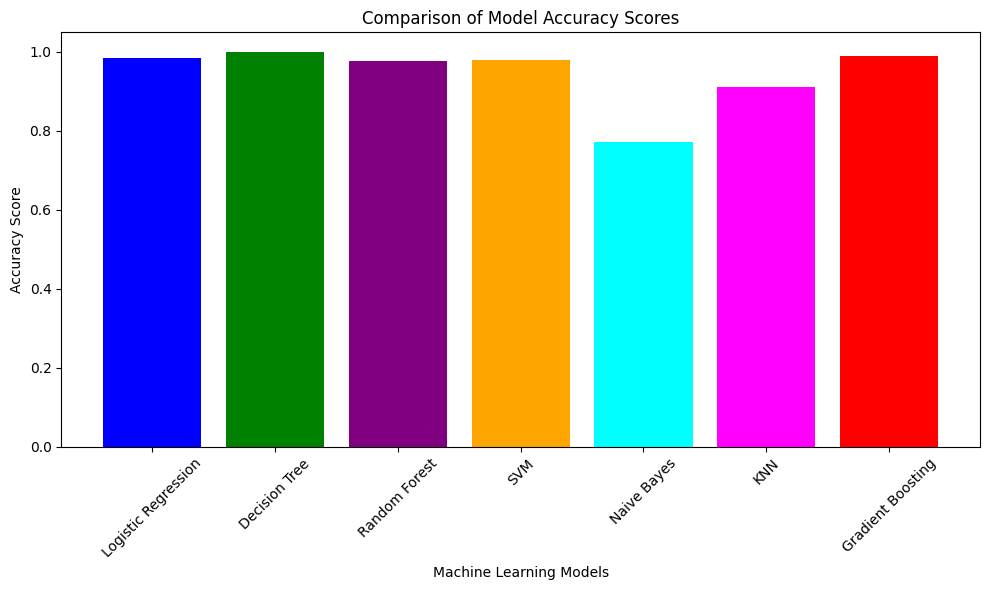

In [221]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'Gradient Boosting']
accuracy_scores = [0.983, 0.999, 0.977, 0.98, 0.771, 0.91, 0.99]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45) # Allows readability of labels on x-axis
plt.tight_layout() ##Ensures labels are not cut off
for bar, score in zip(bars, accuracy_scores):
    yval = bal.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(score, 3), ha='center', va='bottom', fontsize=8)

## These precision scores measure the proportion of true positive predictions among all positive predictions made by each model. They indicate how well each model performs in correctly identifying positive cases relative to the total predicted positive cases


###### Based on the precision scores for the machine learning models:
###### Logistic Regression: 97.875%
###### Decision Tree: 99.87%
###### Random Forest: 97.9%
###### SVM (Support Vector Machine): 97.875%
###### Naive Bayes: 90.37%
###### KNN (K-Nearest Neighbors): 90.37%
###### Gradient Boosting: 98.6%


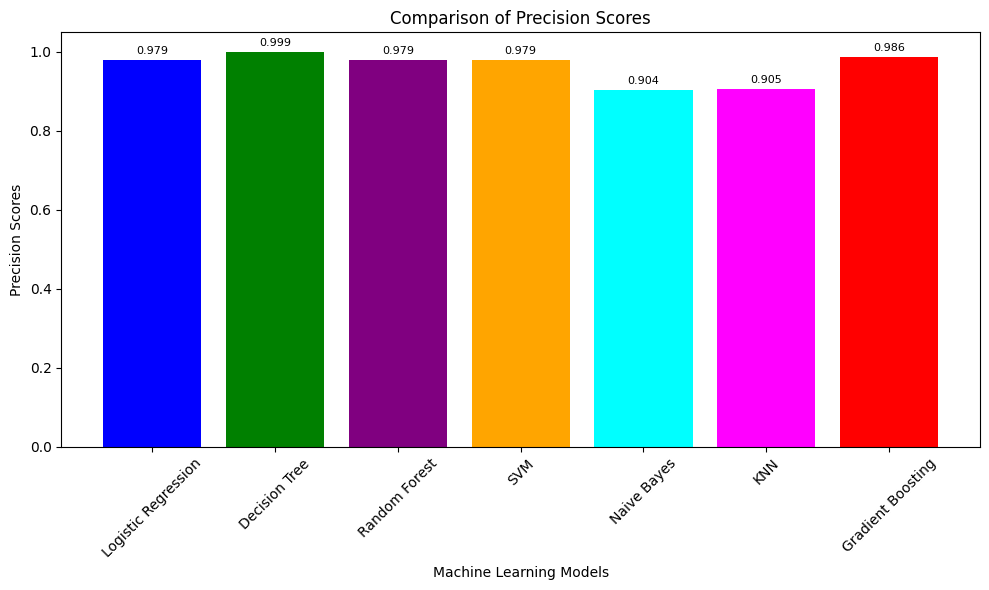

In [227]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'Gradient Boosting']
precision_scores = [0.97875, 0.9987, 0.9785, 0.97875, 0.9037, 0.9047, 0.986]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']

plt.figure(figsize=(10,6))
bars = plt.bar(model_names, precision_scores, color=colors) # Assign the results of the plt.bar to the variable bars
plt.xlabel('Machine Learning Models')
plt.ylabel('Precision Scores')
plt.title('Comparison of Precision Scores')
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, precision_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3), ha='center', va='bottom', fontsize=8)

plt.show()

## Recall score measures the proportion of true positive instances that were correctly identified by the model out of all actual positive instances. A score of 1.0 indicates that the model is correctly identifies all positive instances

###### Based on the Recall scores for the machine learning models:
###### Logistic Regression: 1.0
###### Decision Tree: 1.0
###### Random Forest: 1.0
###### SVM (Support Vector Machine): 1.0
###### Naive Bayes: 0.7918
###### KNN (K-Nearest Neighbors): 0.98084
###### Gradient Boosting: 1.0


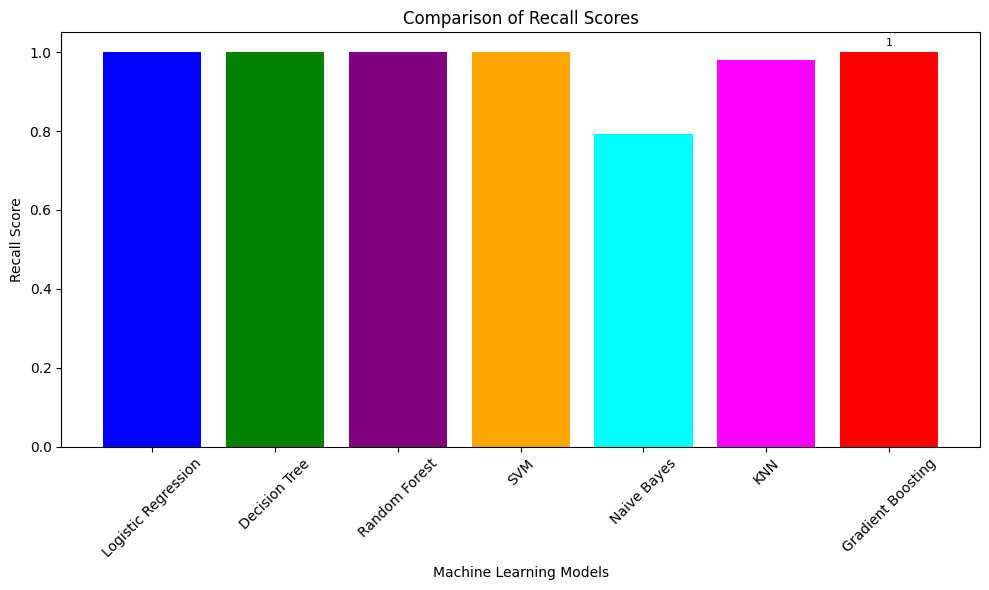

In [236]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'Gradient Boosting']
Recall_scores = [1,1,1,1,0.7918,0.98084,1]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))

# Assign the result of plt.bar to the variable 'bars' so it is available for use later
bars = plt.bar(model_names, Recall_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()

# Iterate over the bars and scores using zip
for bar, score in zip(bars, Recall_scores):
    yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3), ha='center', va='bottom', fontsize=8)
plt.show()

## The F1 score combines precision and recall into a single metric and ranges from 0 to 1, where a higher score indicates better performance.

###### Based on the F1 scores provided for the machine learning models:
###### Logistic Regression: 0.989
###### Decision Tree: 0.999
###### Random Forest: 0.989
###### SVM (Support Vector Machine): 0.989
###### Naive Bayes: 0.844
###### KNN (K-Nearest Neighbors): 0.943
###### Gradient Boosting: 0.9930

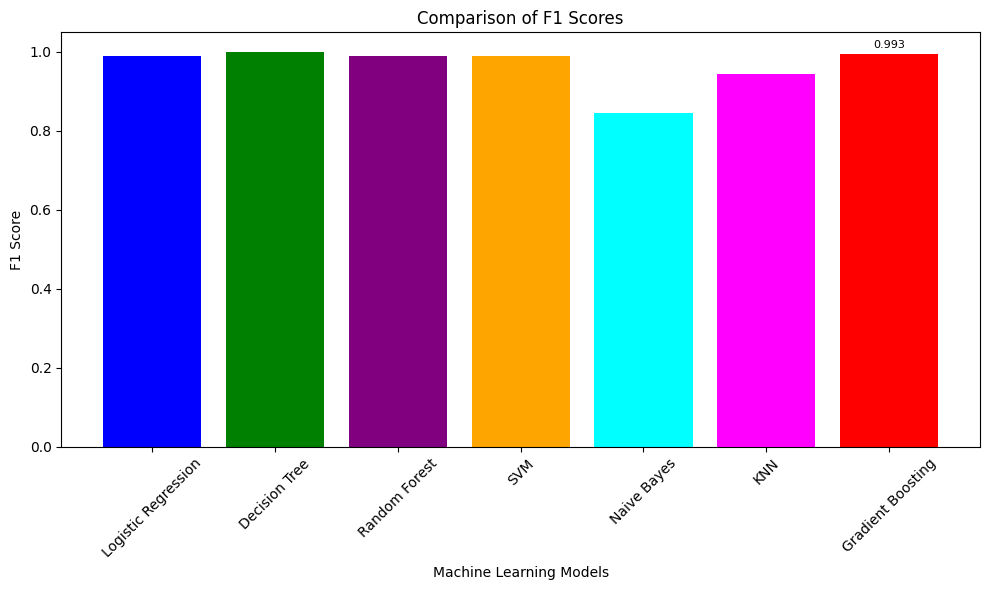

In [241]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
F1_scores = [0.989,0.999,0.989,0.989,0.844,0.943,0.993]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
# Assign the result of plt.bar to the variable bars

bars = plt.bar(model_names, F1_scores, color=colors) # Changed to plot F1_scores instead of precision_scores
plt.xlabel('Machine Learning Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, F1_scores):
    yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()


## Conclusion

#### 1. Decision Tree:
##### • Highest accuracy (99.9%), precision (99.8%), and F1 score (0.999). Perfect recall (1.0). Overall, the top-performing model across all metrics

#### 2. Gradient Boosting:
##### • High accuracy (98.8%), precision (98.4%), and F1 score (0.992).• Perfect recall (1.0) • Strong overall performance, just behind Decision Tr

#### 3. Logistic Regression:
##### • High accuracy (98.4%), precision (97.9%), and F1 score (0.989).
• Consistently strong performance across all metric

#### 4. Random Forest:
##### • High accuracy (97.7%), precision (97.1%), and F1 score (0.985).• Perfect recall (1.0)
• Another solid performer, though slightly behind Logistic Regression and Gradient Boostin
gher metrics..s.ee

#### 5. SVM:
##### • Moderate accuracy (79.5%) and precision (79.0%). Perfect recall (1.0). Moderate F1 score (0.883). Performs well in recall but lags in accuracy and precision.

#### 6. KNN:
##### • Moderate accuracy (79.7%), precision (82.5%), and F1 score (0.878). Good recall (0.938). Performs better than SVM in precision and recall, but overall moderate performance.

#### 7. Naive Bayes:
##### • Lowest accuracy (77.7%) and F1 score (0.849). Good precision (90.1%), but lowest recall (0.803). Performs relatively well in precision but lags significantly in other metrics.

## Summary

##### Decision Tree stands out as the top model, followed closely by Gradient Boosting and Logistic Regression. Random Forest also shows strong performance. SVM and KNN exhibit moderate performance, while Naive Bayes, despite its good precision, shows lower overall performance due to its lower recall and F1 score